# 08.01 Decision-Tree

    - Regression 과 Classification 모두 가능
    - CART (Classification And Regression Tree)
    
```

Decision Tree 의 분류법

1. 독립변수와 기준값 설정
    * 기준값 : 정보획득량(Information Gain)이 큰 독립변수와 기준값 선택
        *Information Gain : IG[Y,X] = H[Y] - H[Y|X]
    

2. 부모 노드(전체 데이터)를 1.의 기준으로 나눠 자식노드 2개를 생성

3. 1.-2. 과정을 반복하며 분류 지속

4. 분류 중지
    1) 순수한 분류 완료
    2) depth설정 제한
    3) 분류 대상 데이터 갯수가 너무 작을 때
   
   
5. 한계
    1) overfitting : MNIST digits 이미지의 경우, x<15의 독립변수, 기준값이 설정된다면, 하나의 픽셀을 기준으로 이미지 전체를 판단하겠다는 것. 매우 심한 overfitting으로 테스트 성능은 매우 좋으나, 검증 성능이 매우 떨어지는 현상 발생할 수 있음
    
    2) greedy 의사결정 : 특징의 선택이 greedy한 방식으로 이뤄짐. 따라서, 결과적으로 최적의 의사결정 결과가 아닐 수 있음.
    ex) 매 depth마다 최적의 특징을 찾으려 모든 특징을 검사함. 하지만, 최적이 아닌 특징이 다음 다음 depth에서 다른 특징과 조합을 통해 최적의 기준 독립변수로 작용할 수 있음. greedy한 의사결정(의사결정나무와 같은)은 이러한 맹점이 있다.
    
    
6. 회귀 나무 
    1) 독립변수의 기준값(threshold)를 정한 후, 종속변수 값을 이진분류로 귀속시키는 과정을 반복해, 회귀 구간을 만들어 나가는 방법


```    

### 1. Scikit-Learn의 의사결정나무 클래스

```

DecisionTreeClassifier

```

### 2. 예제 : Iris 데이터

**1) 꽃잎(petal)데이터 활용**

In [1]:
from sklearn.datasets import load_iris

data = load_iris()
y = data.target
X = data.data[:, 2:]
feature_names = data.feature_names[2:]

from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(X, y)

In [4]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz


def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)

    return Z

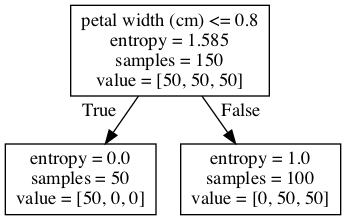

In [5]:
draw_decision_tree(tree1)

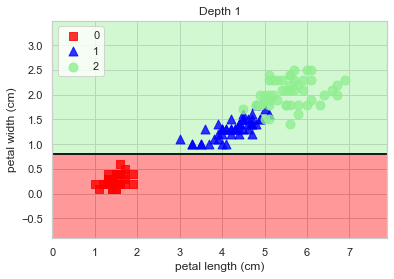

In [6]:
plot_decision_regions(X, y, tree1, "Depth 1")
plt.show()

In [7]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, tree1.predict(X))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0, 50,  0]])

In [9]:
# depth +1 추가

tree2 = DecisionTreeClassifier(
    criterion='entropy', max_depth=2, random_state=0).fit(X, y)

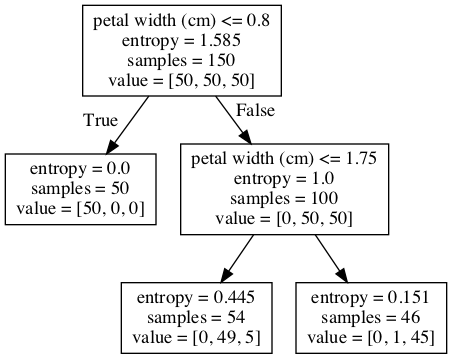

In [11]:
draw_decision_tree(tree2)

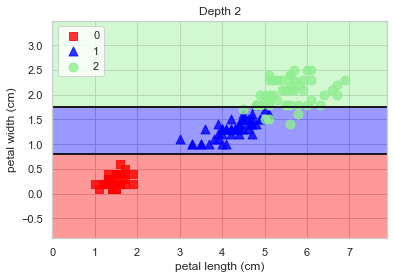

In [12]:
plot_decision_regions(X, y, tree2, "Depth 2")
plt.show()

In [14]:
confusion_matrix(y, tree2.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]])

In [17]:
# depth +1 추가

tree3 = DecisionTreeClassifier(
    criterion='entropy', max_depth=3, random_state=0).fit(X, y)

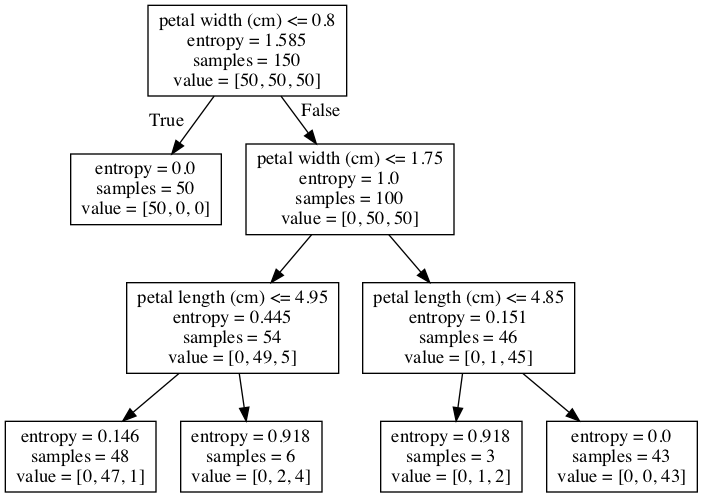

In [18]:
draw_decision_tree(tree3)

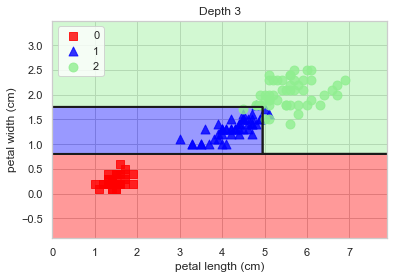

In [19]:
plot_decision_regions(X, y, tree3, "Depth 3")
plt.show()

In [21]:
confusion_matrix(y, tree3.predict(X))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

In [22]:
# depth +1 추가

tree4 = DecisionTreeClassifier(
    criterion='entropy', max_depth=4, random_state=0).fit(X, y)

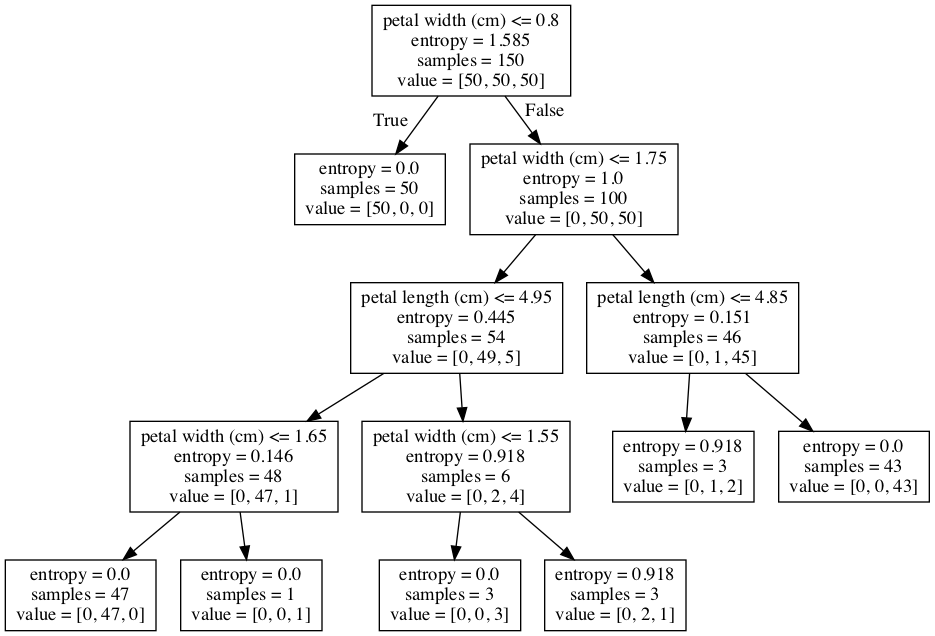

In [23]:
draw_decision_tree(tree4)

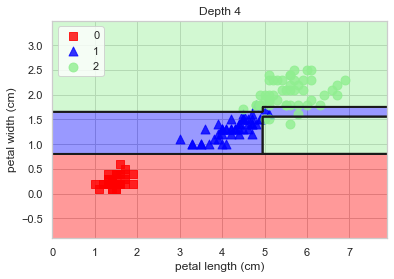

In [24]:
plot_decision_regions(X, y, tree4, "Depth 4")
plt.show()

In [25]:
confusion_matrix(y, tree4.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  1, 49]])

In [26]:
# 모형 성능 검증

# 1. 분류 리포트

from sklearn.metrics import classification_report

print(classification_report(y, tree4.predict(X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.98      0.98        50
           2       0.98      0.98      0.98        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [27]:
# 2. 교차 검증

from sklearn.model_selection import KFold, cross_val_score

cv = KFold(5, shuffle=True, random_state=0)
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, 
                               random_state=0)
cross_val_score(model, X, y, scoring="accuracy", cv=cv).mean()

0.9466666666666667

**2) 꽃받침(sepal)데이터 활용**

```
1. 붓꽃 분류 문제에서 꽃받침의 길이와 폭(sepal length, sepal width)을 사용하여 max_depth=3인 의사결정나무 모형을 만들고 정확도(accuracy)를 계산하라.

2. K=5 인 교차 검증을 통해 테스트 성능 평균을 측정하라.

3. max_depth 인수를 바꾸어 가면서 테스트 성능 평균을 구하여 cross validation curve를 그리고 가장 테스트 성능 평균이 좋은 max_depth 인수를 찾아라.

```

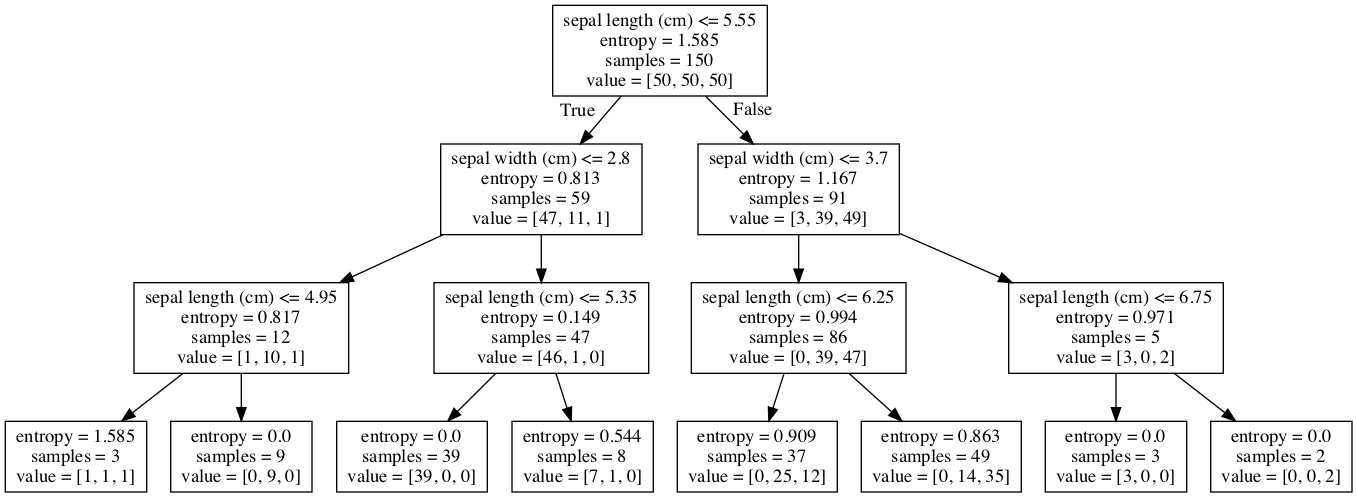

In [28]:
data = load_iris()
y = data.target
X = data.data[:, :2]
feature_names = data.feature_names[:2]
tree_ = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(X, y)

draw_decision_tree(tree_)

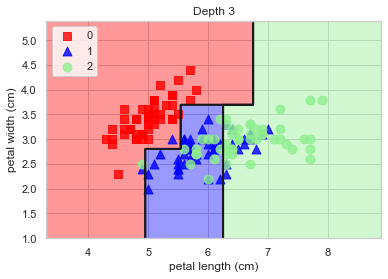

In [32]:
plot_decision_regions(X, y, tree_, "Depth 3")
plt.show()

In [29]:
print(classification_report(y, tree_.predict(X)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        50
           1       0.74      0.68      0.71        50
           2       0.73      0.74      0.73        50

    accuracy                           0.81       150
   macro avg       0.80      0.81      0.80       150
weighted avg       0.80      0.81      0.80       150



In [57]:
from sklearn.model_selection import KFold, cross_val_score

cv = KFold(5, shuffle=True, random_state=0)
cross_val_score(tree_, X, y, sc oring="accuracy", cv=cv)

array([0.6       , 0.46666667, 0.7       , 0.73333333, 0.8       ])

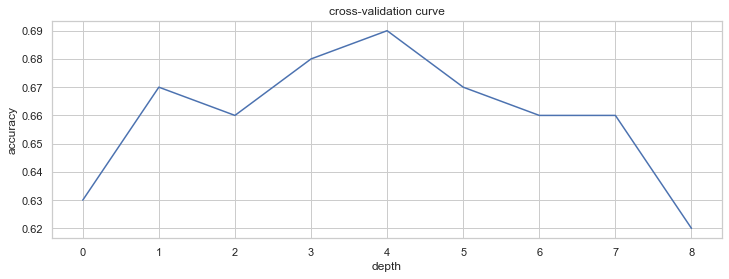

In [72]:
cv = KFold(5, shuffle=True, random_state=0)
result=[]

for i in range(1,9+1):
    tree_new = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=0).fit(X, y)
    result.append(round(cross_val_score(tree_new, X, y, scoring="accuracy", cv=cv).mean(),2))
    
plt.figure(figsize=(12,4))
plt.title("cross-validation curve")
plt.xlabel("depth")
plt.ylabel("accuracy")
plt.plot(result)
plt.show()